# WFIRST SPLC - mini design survey varying the support strut thickness

Neil Zimmerman, STScI, 10/11/16

In [1]:
import scda
import pprint
import logging
import os
import numpy as np
scda.configure_log()
import pprint

import matplotlib
import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.linewidth'] = 1.
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['font.size'] = 15

Populating the interactive namespace from numpy and matplotlib


## Parameter configuration

In [2]:
wfirst_pupil_vary = {'N':250, 'prim':'wfirst', 'centobs':31, 'thick':['000','130','200','260'], 'edge':'round'}
fpm_65deg_H = {'R0': 2.5, 'R1': 9., 'openang':65, 'orient':'H', 'fpmres': 4}
LS_N050_30d90 = {'N': 50, 'shape':'ann', 'obscure':0, 'id':30, 'od':90}
image_params = {'c':7.8, 'dR':0., 'bw':0.18, 'Nlam':5}

In [3]:
survey_params = {'Pupil': wfirst_pupil_vary,
                 'FPM': fpm_65deg_H,
                 'LS': LS_N050_30d90,
                 'Image': image_params}

## File path configuration

In [4]:
input_dir = os.path.expanduser("~/Box Sync/scda/InputMasks_wfirst") # location of input TelAp, FPM, and LS arrays
survey_dir = os.path.expanduser("~/Box Sync/scda/wfirst_splc")

if not os.path.exists(survey_dir):
    os.mkdir(survey_dir)
    print("Created survey directory {:s}".format(survey_dir))
else:
    print("The survey directory {:s} already exists".format(survey_dir))

os.chdir(survey_dir)
    
survey_fname = os.path.basename(survey_dir) + '.pkl'
TelAp_dir = os.path.join(input_dir, "TelAp")
FPM_dir = os.path.join(input_dir, "FPM")
LS_dir = os.path.join(input_dir, "LS")
ampl_src_dir = os.path.normpath("./amplsrc")
slurm_dir = os.path.normpath("./slurmsh")
sol_dir = os.path.normpath("./solutions")
log_dir = os.path.normpath("./logs")

fileorg = {'work dir': '.', 'TelAp dir': TelAp_dir,
           'FPM dir': FPM_dir, 'LS dir': LS_dir}

#solver = {'method':'dualsimp'}
solver = {'method':'barhom'}

The survey directory /Users/ntz/Box Sync/scda/wfirst_splc already exists


## Survey object initiation

In [5]:
survey = scda.DesignParamSurvey(scda.HalfplaneSPLC, survey_params, fileorg=fileorg, solver=solver)

In [6]:
survey.describe()

This survey has 4 design parameter combinations.
1 parameters are varied: (('Pupil', 'thick'),)

File organization:
{'FPM dir': '/Users/ntz/Box Sync/scda/InputMasks_wfirst/FPM',
 'LS dir': '/Users/ntz/Box Sync/scda/InputMasks_wfirst/LS',
 'TelAp dir': '/Users/ntz/Box Sync/scda/InputMasks_wfirst/TelAp',
 'ampl src dir': '.',
 'eval dir': '.',
 'log dir': '.',
 'slurm dir': '.',
 'sol dir': '.',
 'work dir': '.'}

All input files exist? True

Last coronagraph in survey list:
Telescope aperture file /Users/ntz/Box Sync/scda/InputMasks_wfirst/TelAp/TelAp_half_wfirstCobs31sthick260_N0250.dat
Focal plane mask file /Users/ntz/Box Sync/scda/InputMasks_wfirst/FPM/FPM_quart_diaphragm_010M036_H065deg.dat
Lyot stop file /Users/ntz/Box Sync/scda/InputMasks_wfirst/LS/LS_half_ann30D90_clear_N0050.dat
Job label SPLC_half_wfirstCobs31sthick260_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1
Varied parameter combo tuple:
('260',)


## Create survey files

In [7]:
bundle_dir = os.path.expanduser("~/Box Sync/scda/wfirst_splc")
bundlec_coron_list = scda.make_ampl_bundle(survey.coron_list, bundle_dir, queue_spec='12h')

Wrote SPLC_half_wfirstCobs31sthick000_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1.mod
Wrote SPLC_half_wfirstCobs31sthick130_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1.mod
Wrote SPLC_half_wfirstCobs31sthick200_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1.mod
Wrote SPLC_half_wfirstCobs31sthick260_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1.mod


In [8]:
#os.listdir(bundle_dir)

In [9]:
survey.get_metrics(verbose=True)

////////////////////////////////////////////////////////
SPLC_half_wfirstCobs31sthick000_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1
Incident energy on aperture (dimensionless): 0.709
Non-binary residuals, as a percentage of clear telescope aperture area: 0.07%
Band-averaged total throughput: 24.84%
Band-averaged half-max throughput: 6.49%
Band-averaged half-max throughput, circ. ref.: 5.85%
Band-averaged r=.7 lam/D throughput: 6.67%
Band-averaged r=.7 lam/D throughput, circ. ref.: 6.02%
Band-averaged relative half-max throughput: 16.89%
Band-averaged relative r=0.7 lam/D throughput: 11.56%
Band-averaged FWHM PSF area / (lambda0/D)^2: 1.31
////////////////////////////////////////////////////////
SPLC_half_wfirstCobs31sthick130_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1
Incident energy on aperture (dimensionless): 0.677
Non-binary residuals, as a percentage of clear telescope aperture area: 0.07%
Band-a

## List half-max PSF throughput of each design

In [10]:
for coron in survey.coron_list:
    print("Strut thickness {:.2f}%: half-max PSF throughput = {:.2f}%".format(
           float(coron.design['Pupil']['thick'])/100, coron.eval_metrics['fwhm thrupt']*100))

Strut thickness 0.00%: half-max PSF throughput = 6.49%
Strut thickness 1.30%: half-max PSF throughput = 5.91%
Strut thickness 2.00%: half-max PSF throughput = 5.26%
Strut thickness 2.60%: half-max PSF throughput = 4.67%


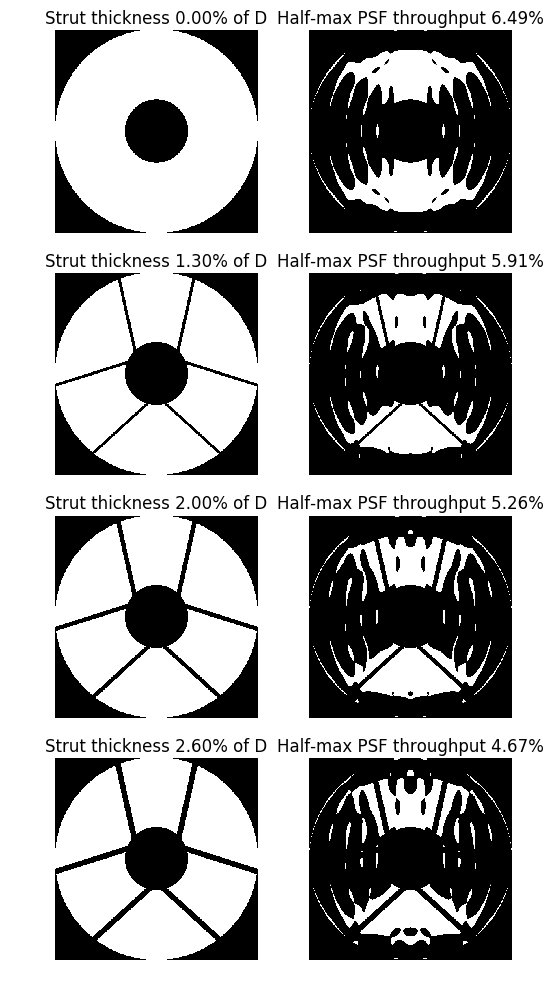

In [11]:
#plt.figure(figsize=(8,16))
plt.figure(figsize=(6,12))
for jj, coron in enumerate(survey.coron_list):
    TelAp_hp = np.round(np.loadtxt(coron.fileorg['TelAp fname'])).astype(int)
    TelAp = np.concatenate((TelAp_hp[:,::-1], TelAp_hp), axis=1)
    A_col = np.loadtxt(coron.fileorg['sol fname'])[:,-1]
    A_hp = A_col.reshape(TelAp_hp.shape)
    Apod = np.concatenate((A_hp[:,::-1], A_hp), axis=1)
    subplot_index_telap = int("42{:d}".format(2*jj+1))
    subplot_index_apod = int("42{:d}".format(2*jj+2))
    plt.subplot(subplot_index_telap)
    plt.imshow(TelAp)
    plt.axis('off')
    plt.title('Strut thickness {:.2f}% of D'.format(float(coron.design['Pupil']['thick'])/100), fontsize=12)
    plt.subplot(subplot_index_apod)
    plt.imshow(Apod)
    plt.axis('off')
    plt.title('Half-max PSF throughput {:.2f}%'.format(coron.eval_metrics['fwhm thrupt']*100), fontsize=12)

# Example PSF evaluation

In [12]:
coron = survey.coron_list[2]
coron.fileorg['job name']

'SPLC_half_wfirstCobs31sthick200_N0250r_FPM25R090H065res04_LSann30D90clearN0050_ImgC078BW18Nlam05dR0res2_linbarhompre1'

In [13]:
intens_polychrom, seps, radial_intens_polychrom, _ = coron.get_onax_psf()

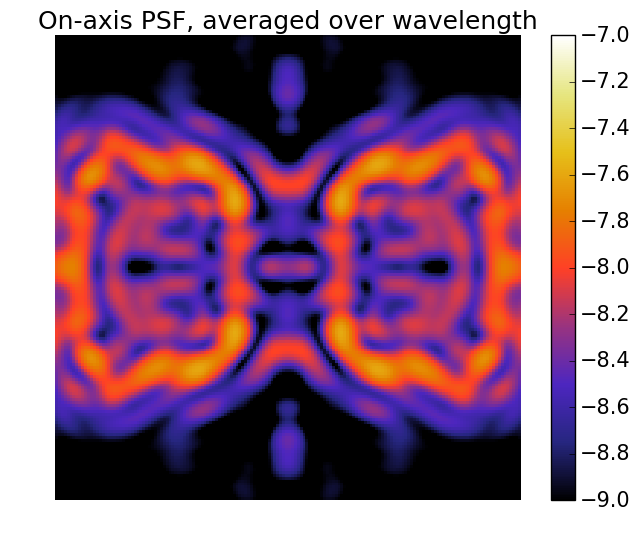

In [14]:
plt.figure(figsize=(8,6))
plt.imshow(np.log10(np.mean(intens_polychrom, axis=0)), vmin=-9, vmax=-7, cmap='CMRmap')
plt.colorbar()
plt.title('On-axis PSF, averaged over wavelength')
p=plt.axis('off')

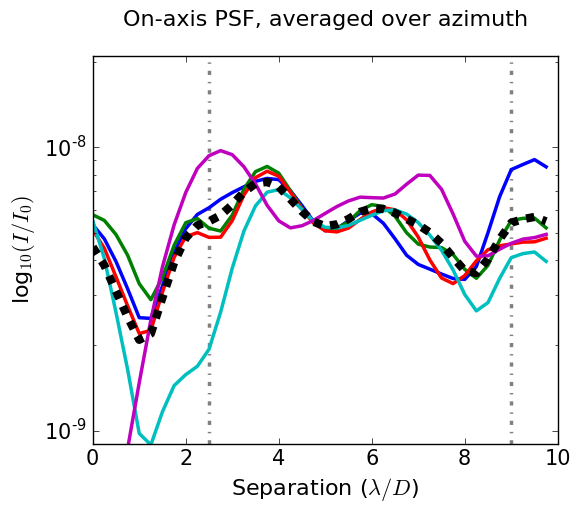

In [15]:
plt.figure(figsize=(6,5))
for w in range(radial_intens_polychrom.shape[0]):
    plt.semilogy(seps, radial_intens_polychrom[w,:])
plt.semilogy(seps, np.mean(radial_intens_polychrom, axis=0), 'k--', linewidth=6)
plt.vlines(coron.design['FPM']['R0'], 10**-12, 1, linestyle='-.', color='gray')
plt.vlines(coron.design['FPM']['R1'], 10**-12, 1, linestyle='-.', color='gray')
plt.ylim([9e-10,2.1e-8])
plt.ylabel(r'log$_{10}(I/I_0)$',fontsize=16)
plt.xlabel(r'Separation ($\lambda/D$)',fontsize=16)
plt.title('On-axis PSF, averaged over azimuth\n', fontsize=16)